In [2]:
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
import numpy as np
import math

In [30]:
os.getcwd()
os.chdir('/Users/tayaerogers/Desktop/CS315/cs315proj1-1')

In [52]:
folders = ["data_13yrs", "18yrsold", "data_23yearolds_40files", "28yrsold", "38yrsold"] #ADD 33 YOS
ages = ['13', '18', '23', '28', '38'] #ADD 33
attrs = ['likes', 'comments', 'shares', 'saves']

### Functions

In [43]:
def getAllValues(fn, folder, column):
    with open(f"{folder}/{fn}",  encoding='utf8') as fin:
        dr = csv.DictReader(fin)
        authors = [row[column] for row in dr]
    return authors

In [44]:
"""
Takes an attribute (supposed to be 'likes', 'comments', 'shares', or 'saves'), returns list of tuples of acc1's and acc2's values for that attribute
"""
def df_of_attr(attri, folder):
        acc1_attri = []
        acc2_attri = []
        for a1, c1 in pairs:
            acc1 = getAllValues(a1, folder, attri)
            acc2 = getAllValues(c1, folder, attri)
            acc1_attri.append(sum(map(int, acc1))/len(acc1))
            acc2_attri.append(sum(map(int, acc2))/len(acc2))
            attri_tuples = list(zip(acc1_attri, acc2_attri))
        return attri_tuples

In [45]:
"""
Takes an attribute (supposed to be 'likes', 'comments', 'shares', or 'saves'), returns updated dataframe
"""
def tuple_to_df(attr, folder):
    if attr in ['likes', 'comments', 'shares', 'saves']:
        temp_tuples = df_of_attr(attr, folder)
        d[attr] = pd.concat([d[attr], pd.DataFrame(temp_tuples, columns=['acc1', 'acc2'])], ignore_index=True)
        d[attr].index = np.arange(1, len(d[attr])+1)
        return d[attr]
   # else: -- to be safe
   #     return fail

In [46]:
## source: https://realpython.com/python-rounding/#:~:text=To%20implement%20the%20rounding%20up,equal%20to%20a%20given%20number.
def round_up(n, decimals=0):
    multiplier = 10**decimals
    return math.ceil(n * multiplier) / multiplier

In [47]:
def get_no_digits(max):
    no_digits_left = len(str(max).split('.')[0]) # from https://stackoverflow.com/questions/6189956/easy-way-of-finding-decimal-places
    return -1*(no_digits_left-1) # 1 fewer digit to the left of the decimal, multiplied by negative 1

In [48]:
def get_max(dataset):
    data_max = max(dataset.max().iloc[0], dataset.max().iloc[1]) # maximum value in the dataframe (across both columns)
    digits_round = get_no_digits(data_max)
    round_data_max = round_up(data_max, digits_round) # rounded up to the next 1,000 above the maximum
    return round_data_max

In [54]:
def make_plot(axis_no, attr):
    axis_no.plot(d[attr].index, d[attr]['acc1'], label='acc1')
    axis_no.plot(d[attr].index, d[attr]['acc2'], '-.', label='acc2')
    ylim = get_max(d[attr])
    axis_no.set_ylim(0,ylim)
    axis_no.set_xticks(range(1,21));
    axis_no.set_xlabel('Runs')
    axis_no.set_ylabel(attr)
    plt.legend(['acc1', 'acc2']) #loc='lower center')

### ~Main

40
('13_Sec02Gr1Sc13Activ_ML_02-13-16-10_like_by_control_data_all_videos.csv', '13_Sec02Gr1Sc13Cntrl_ML_02-13-16-11_like_by_hashtag_data_all_videos.csv')
41
('-1_Sec02Gr2Sc18Activ_JY_02-14-17-28_like_by_control_data_all_videos.csv', '-1_Sec02Gr2Sc18Cntrl_JY_02-14-17-29_like_by_hashtag_data_all_videos.csv')
40
('23_Sec02Gr2Sc23Activ_TR_02-12-23-52_like_by_hashtag_data_all_videos.csv', '23_Sec02Gr2Sc23Cntrl_TR_02-12-23-53_like_by_hashtag_data_all_videos.csv')
41
('28_Sec02Gr1Sc28Activ_SH_02-14-13-19_like_by_hashtag_data_all_videos.csv', '28_Sec02Gr1Sc28Cntrl_SH_02-14-13-20_like_by_hashtag_data_all_videos.csv')
41
('38_Sec02Gr1Sc38Activ_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv')


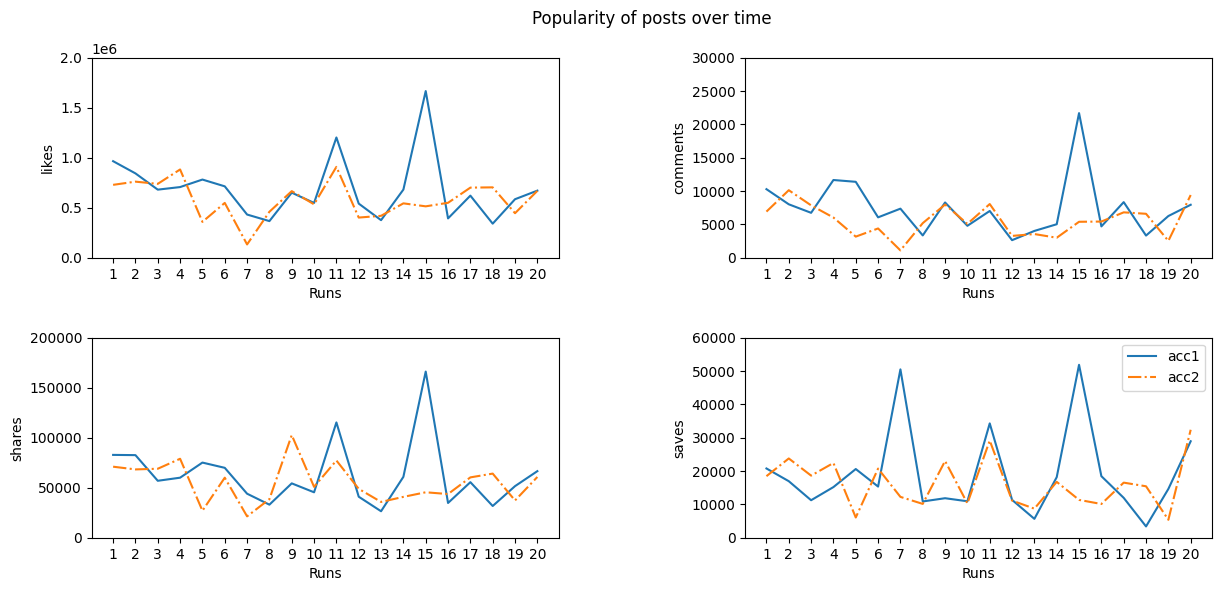

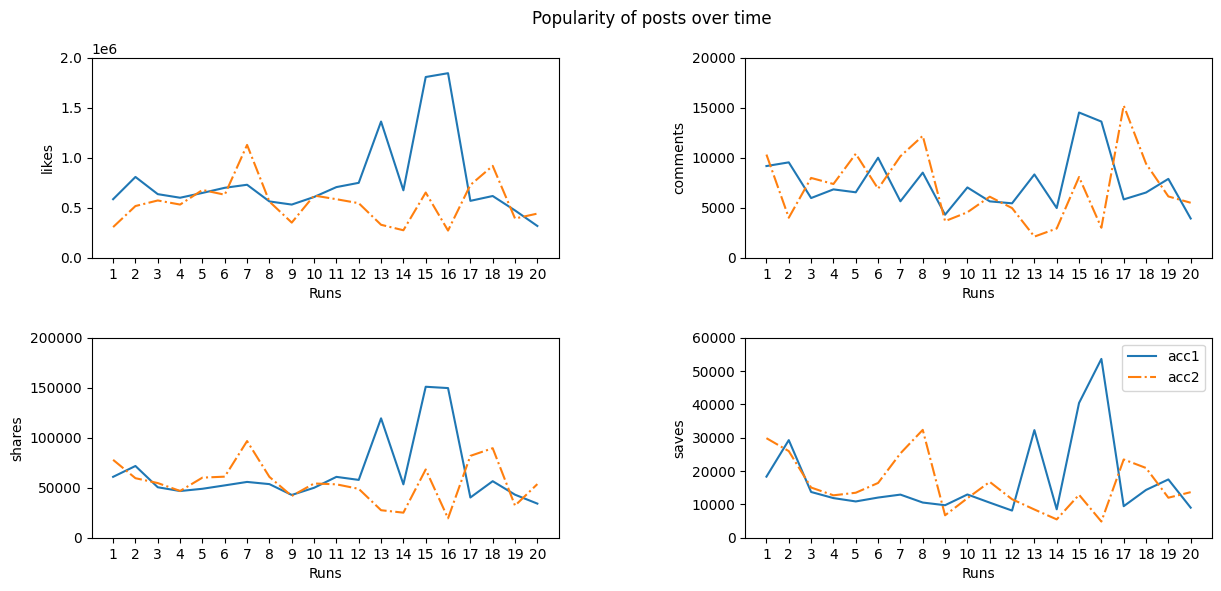

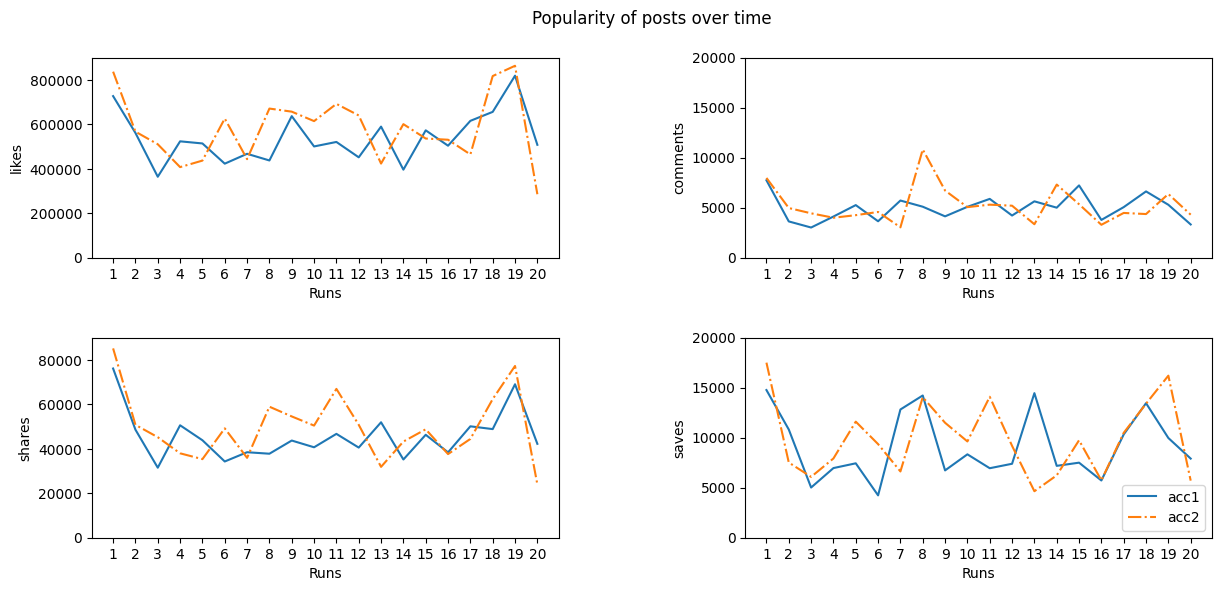

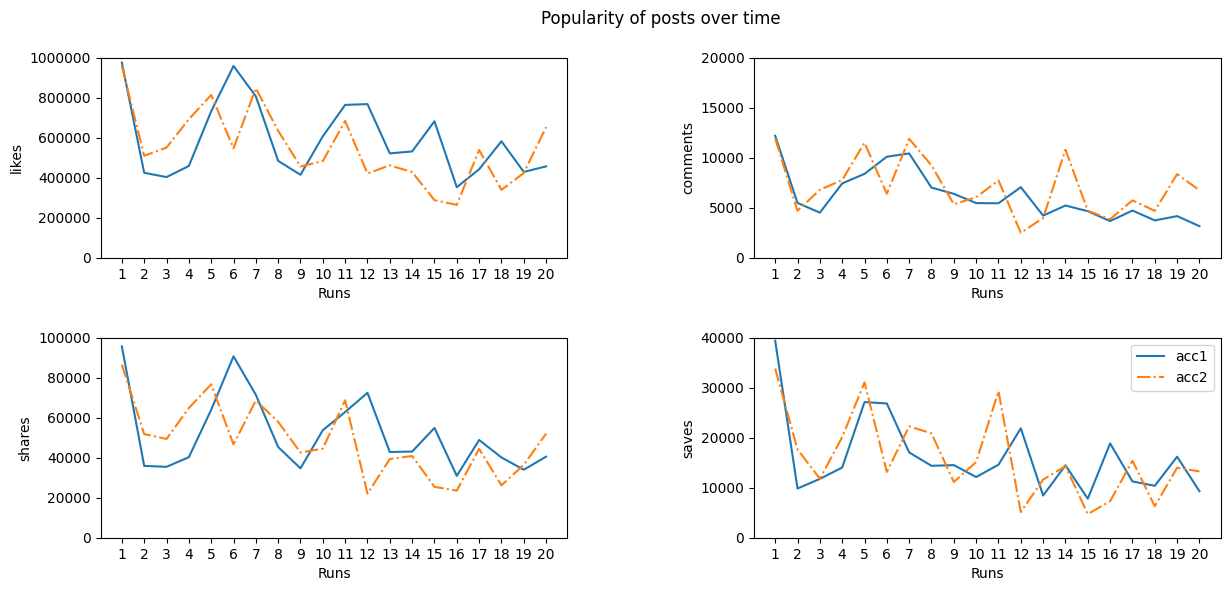

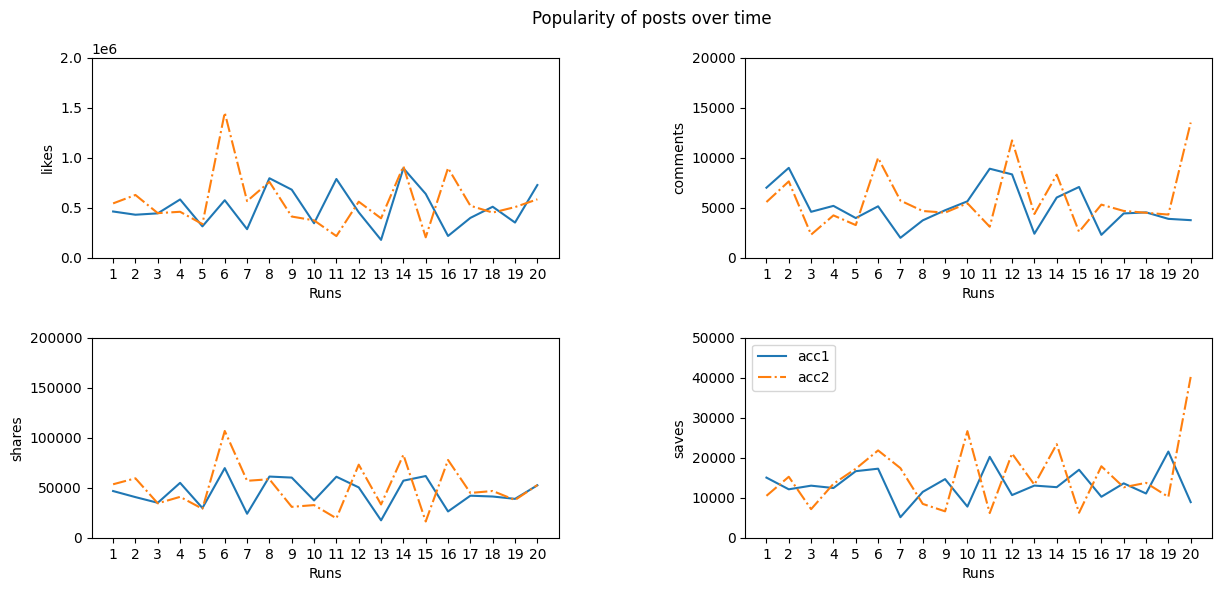

In [57]:
for folder in folders:
    files = os.listdir(folder)
    print(len(files))
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    files.sort()
    pairs = list(zip(files[:20], files[20:40]))
    print(pairs[0])
    a1, c1 = pairs[-1]
    a1, c1
    d = {attr: pd.DataFrame() for attr in attrs}
    [tuple_to_df(attr, folder) for attr in attrs]

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
    fig.suptitle('Popularity of posts over time')
    make_plot(ax1, attrs[0])
    make_plot(ax2, attrs[1])
    make_plot(ax3, attrs[2])
    make_plot(ax4, attrs[3])
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4) # from https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
